In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD


In [ ]:
# Genarating data

from sklearn.datasets import make_moons
x, y= make_moons(n_samples=1000, noise=0.2)
x.shape, y.shape

((1000, 2), (1000,))

[[ 0.11627     1.07927137]
 [ 0.20952667  0.26896121]
 [ 1.39440598 -0.21120821]
 [ 0.8240983  -0.85136096]]
[0 1 1 1]


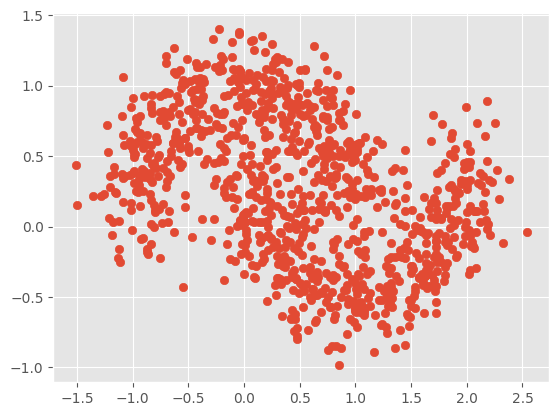

In [ ]:
print(x[1:5])
print(y[1:5])
plt.scatter(x[:,0],x[:,1])

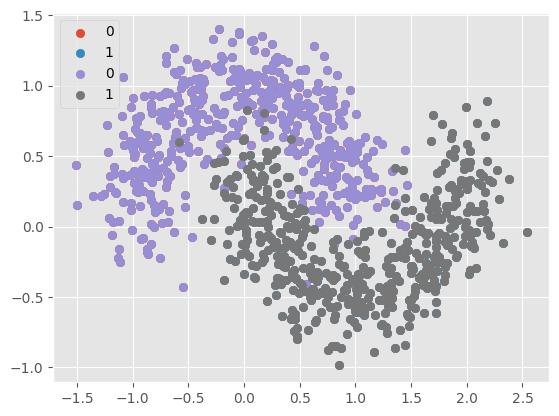

In [ ]:
for i in range(2):
  ind = x[np.where(y==i)]
  # print(ind[:,0])
  plt.scatter(ind[:,0],ind[:,1] ,label = str(i))
plt.legend()

for i in range(2):
    ind= np.where(y==i)
    plt.scatter(x[ind,0][0], x[ind,1][0], label=str(i))
    plt.legend()

In [ ]:
from sklearn.datasets import load_diabetes
df =load_diabetes()
df.keys()


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
x = pd.DataFrame(df.data, columns = df.feature_names)
y= pd.Series(df.target)
x.shape, y.shape

((442, 10), (442,))

In [ ]:
print(x.head())
print(y.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
dtype: float64


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 442 entries, 0 to 441
Series name: None
Non-Null Count  Dtype  
--------------  -----  
442 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,random_state = 5,test_size = 0.25)
x_train.shape ,x_test.shape , y_train.shape ,y_test.shape

((331, 10), (111, 10), (331,), (111,))

In [ ]:
# creating ANN

model = Sequential()
model.add(Dense(32,activation = 'relu', kernel_initializer = 'he_uniform', input_dim = 10))
model.add(Dense(16,activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(8,activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(1,activation = 'linear'))
model.compile(optimizer="adam", loss = "mse", metrics = "mse" )
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 32)                352       
                                                                 
 dense_27 (Dense)            (None, 16)                528       
                                                                 
 dense_28 (Dense)            (None, 8)                 136       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
11/11 [==============================] - 1s 21ms/step - loss: 28116.6035 - mse: 28116.6035 - val_loss: 31915.1895 - val_mse: 31915.1895
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 28095.1387 - mse: 28095.1387 - val_loss: 31887.4766 - val_mse: 31887.4766
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 28065.3301 - mse: 28065.3301 - val_loss: 31850.5723 - val_mse: 31850.5723
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 28027.7773 - mse: 28027.7773 - val_loss: 31804.5586 - val_mse: 31804.5586
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 27980.3379 - mse: 27980.3379 - val_loss: 31746.6895 - val_mse: 31746.6895
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 27919.8789 - mse: 27919.8789 - val_loss: 31673.2070 - val_mse: 31673.2070
Epoch 7/100
11/11 [==============================] - 0s 8ms/step - loss: 27843.1543 - mse: 27843.1543 - val_loss: 315

In [ ]:
for i in list(history.history.keys()):
  print(i," : ", history.history[i][-1])

loss  :  2995.731201171875
mse  :  2995.7314453125
val_loss  :  3237.67333984375
val_mse  :  3237.67333984375


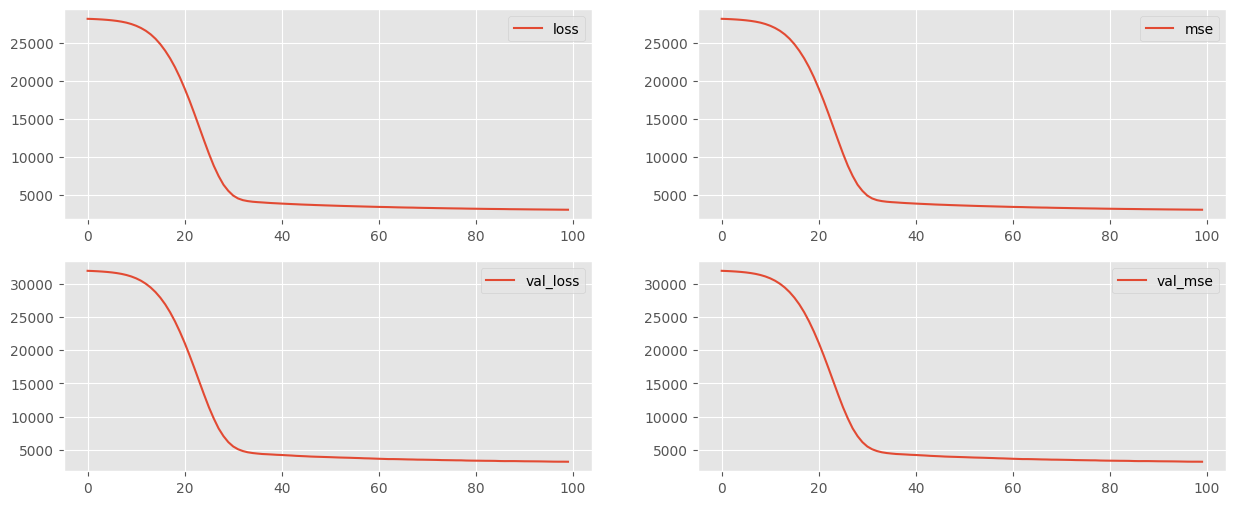

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 6))
i = 1
for k in list(history.history.keys()):
  plt.subplot(2,2,i)
  plt.plot( history.history[k], label = str(k))
  plt.legend()
  i=i+1



In [ ]:
# Early stooping

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model = Sequential()
model.add(Dense(32,activation = 'relu', kernel_initializer = 'he_uniform', input_dim = 10))
model.add(Dense(16,activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(8,activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(1,activation = 'linear'))
model.compile(optimizer="adam", loss = "mse", metrics = "mse", )
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 32)                352       
                                                                 
 dense_31 (Dense)            (None, 16)                528       
                                                                 
 dense_32 (Dense)            (None, 8)                 136       
                                                                 
 dense_33 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs = 100,callbacks=[callback], validation_data = (x_test, y_test))

Epoch 1/100
11/11 [==============================] - 1s 21ms/step - loss: 28050.6035 - mse: 28050.6035 - val_loss: 31812.1758 - val_mse: 31812.1758
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 27981.3262 - mse: 27981.3262 - val_loss: 31722.1855 - val_mse: 31722.1855
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 27892.3203 - mse: 27892.3203 - val_loss: 31607.7344 - val_mse: 31607.7344
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 27775.3418 - mse: 27775.3418 - val_loss: 31456.3086 - val_mse: 31456.3086
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 27617.3984 - mse: 27617.3984 - val_loss: 31249.5449 - val_mse: 31249.5449
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 27399.0547 - mse: 27399.0547 - val_loss: 30963.3203 - val_mse: 30963.3203
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 27100.8887 - mse: 27100.8887 - val_loss: 305

In [ ]:
for i in list(history.history.keys()):
  print(i," : ", history.history[i][-1])

loss  :  2895.019775390625
mse  :  2895.019775390625
val_loss  :  3149.46435546875
val_mse  :  3149.46435546875


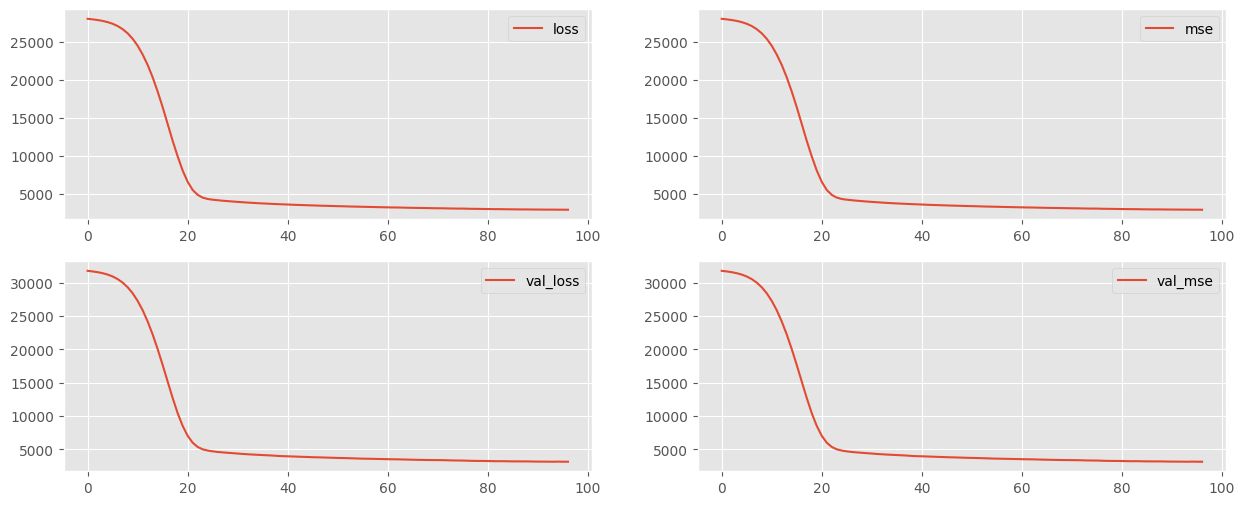

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 6))
i = 1
for k in list(history.history.keys()):
  plt.subplot(2,2,i)
  plt.plot( history.history[k], label = str(k))
  plt.legend()
  i=i+1

In [ ]:
# importing churn data

churn_data = pd.read_csv("Churn_Modelling.csv")
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
x = churn_data.iloc[:,3:12]
y = churn_data.iloc[:,13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,619,France,Female,42,2,0.00,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1
2,502,France,Female,42,8,159660.80,3,1,0
3,699,France,Female,39,1,0.00,2,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1


In [ ]:
dummy = pd.get_dummies(churn_data.iloc[:,4:6])
dummy.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0,0,1,0
1,0,0,1,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,0,0,1,1,0


In [ ]:
x=x.drop(["Geography","Gender"], axis =1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,619,42,2,0.00,1,1,1
1,608,41,1,83807.86,1,0,1
2,502,42,8,159660.80,3,1,0
3,699,39,1,0.00,2,0,0
4,850,43,2,125510.82,1,1,1


In [ ]:
x = pd.concat([x,dummy ], axis=1)
print(x.shape)
x.head()

(10000, 12)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,1,0,0,1,0
3,699,39,1,0.00,2,0,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,0,0,1,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
sc_data = pd.DataFrame(sc.fit_transform(x.iloc[:,:5]), columns=x.iloc[:,:5].columns)
sc_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts
0,0.538,0.324324,0.2,0.000000,0.000000
1,0.516,0.310811,0.1,0.334031,0.000000
2,0.304,0.324324,0.8,0.636357,0.666667
3,0.698,0.283784,0.1,0.000000,0.333333
4,1.000,0.337838,0.2,0.500246,0.000000


In [ ]:
x.drop(x.iloc[:,:5].columns, axis =1, inplace=True)
x.head()

,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,1,1,0,0,1,0
1,0,1,0,0,1,1,0
2,1,0,1,0,0,1,0
3,0,0,1,0,0,1,0
4,1,1,0,0,1,1,0


In [ ]:
x = pd.concat([sc_data,x], axis =1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0,0,1,1,0


In [ ]:
import keras_tuner
import keras

In [ ]:
# using keras_tuner making model for categorical target.

def creat_model(hp):
  model = Sequential()
  for i in range(hp.Int("num_layers",2,10)):
    model.add(Dense(hp.Int("num_neurons", min_value = 32, max_value = 256, step = 32), activation= 'relu'))
  model.add(Dense(1, activation="sigmoid"))
  model.compile(optimizer = keras.optimizers.Adam(0.01), loss = "binary_crossentropy", metrics = "accuracy")
  return model

In [ ]:
tuner = keras_tuner.RandomSearch(creat_model, objective = "val_accuracy", max_trials = 5,
                                 executions_per_trial=3,
                                directory='project_01',
                                  project_name='Air Quality Index_01')
tuner.search_space_summary()

Reloading Tuner from project_01/Air Quality Index_01/tuner0.json
Search space summary
Default search space size: 2
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
num_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,random_state = 5,test_size = 0.25)
x_train.shape ,x_test.shape ,y_train.shape ,y_test.shape

((7500, 12), (2500, 12), (7500,), (2500,))

In [ ]:
tuner.search(x_train, y_train, epochs =5,
             validation_data=(x_test,y_test))

Trial 5 Complete [00h 00m 35s]
val_accuracy: 0.8530666828155518

Best val_accuracy So Far: 0.8561333417892456
Total elapsed time: 00h 09m 02s


In [ ]:
tuner.results_summary()

Results summary
Results in project_01/Air Quality Index_01
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
num_layers: 2
num_neurons: 128
Score: 0.8561333417892456

Trial 3 summary
Hyperparameters:
num_layers: 6
num_neurons: 96
Score: 0.8542666633923849

Trial 4 summary
Hyperparameters:
num_layers: 7
num_neurons: 128
Score: 0.8530666828155518

Trial 1 summary
Hyperparameters:
num_layers: 2
num_neurons: 224
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self.

In [ ]:
tuner.get_best_models()[0]

In [ ]:
# Genarating data

from sklearn.datasets import make_moons
x, y= make_moons(n_samples=1000, noise=0.2)
x.shape, y.shape

((1000, 2), (1000,))

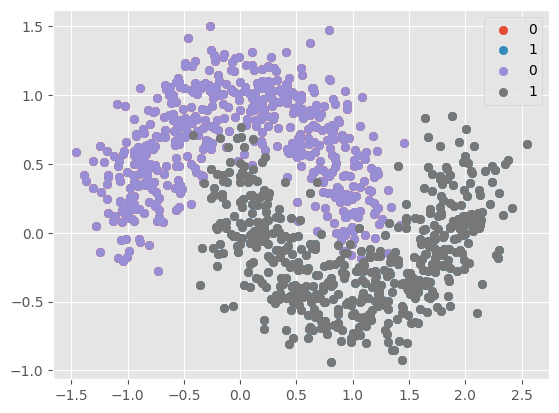

In [ ]:


for i in range(2):
  ind = x[np.where(y==i)]
  # print(ind[:,0])
  plt.scatter(ind[:,0],ind[:,1] ,label = str(i))
plt.legend()

for i in range(2):
    ind= np.where(y==i)
    plt.scatter(x[ind,0][0], x[ind,1][0], label=str(i))
    plt.legend()

In [ ]:
# using keras_tuner making model for continuous target.

def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [ ]:
tuner_linear = keras_tuner.RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Air Quality Index')

Reloading Tuner from project/Air Quality Index/tuner0.json


In [ ]:
tuner_linear.search_space_summary()

Search space summary
Default search space size: 21
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_6

In [ ]:
tuner.search(x_train, y_train, epochs =5, validation_data=(x_test,y_test))

In [ ]:
tuner_linear.results_summary()

Results summary
Results in project/Air Quality Index
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 3 summary
Hyperparameters:
num_layers: 9
units_0: 448
units_1: 192
learning_rate: 0.001
units_2: 384
units_3: 352
units_4: 192
units_5: 320
units_6: 128
units_7: 288
units_8: 128
units_9: 160
units_10: 160
units_11: 512
units_12: 288
units_13: 384
units_14: 288
units_15: 64
units_16: 64
units_17: 480
units_18: 288
Score: 0.08568711827198665

Trial 4 summary
Hyperparameters:
num_layers: 17
units_0: 288
units_1: 32
learning_rate: 0.0001
units_2: 96
units_3: 192
units_4: 320
units_5: 160
units_6: 512
units_7: 192
units_8: 96
units_9: 416
units_10: 416
units_11: 288
units_12: 480
units_13: 512
units_14: 192
units_15: 480
units_16: 256
units_17: 32
units_18: 192
Score: 0.1159332940975825

Trial 2 summary
Hyperparameters:
num_layers: 19
units_0: 480
units_1: 512
learning_rate: 0.001
units_2: 96
units_3: 256
units_4: 256
units_5: 480
units_6: 64
units_7

In [ ]:
tuner_linear.get_best_models()[0]

In [ ]:

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier, KerasRegressor

def create_model(layers, activation):
        model= Sequential()
        for i, nodes in enumerate(layers):
            if i==0:
                model.add(Dense(nodes, input_dim=X_train.shape[1]))
                model.add(Activation(activation))
            else:
                model.add(Dense(nodes))
                model.add(Activation(activation))
        model.add(Dense(1))

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    model= KerasClassifier(model=create_model, verbose=0, activation='relu', layers=20)

In [ ]:
layers=[[20],[40,20], [45, 30, 15]]
activations = ['sigmoid','relu']
param_grid = dict(layers=layers, activation=activations, batch_size=[128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [ ]:
grid_result = grid.fit(x_train, y_train)

ValueError: Invalid parameter activation for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(activation=sigmoid)`
Check the list of available parameters with `estimator.get_params().keys()`